# Cluster Analysis
Business Objective:
    Creating clusters on global development measurement dataset
    
Data Set Details:
    The dataset is having information about important economic and development metrics related to various countries across the globe.
    
Variable Description:
    Birth Rate, Business tax, CO2emissions, Country, Days to start business, Ease of business, energy usage, GDP, healthexp%GDP,
    healthexp/capita, hours to do tax, infant mortality, internet usage, lending rate, life expectancy female, etc.
    
Acceptance Criterion: 
    Work on different clustering models, do a comparative analysis and need to deploy the clustering application on streamlit, flask etc.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
global_data = pd.read_excel('World_development_mesurement.xlsx')

In [3]:
global_data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [4]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
global_data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [6]:
global_data.dtypes
#list the type of the columns

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [7]:
global_data.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


# Remove Duplicate Values

In [8]:
global_data[global_data.duplicated()].shape

(0, 25)

No duplicate value found

# Change The dtype object to float64

In [9]:
global_data['Business Tax Rate'].values

array([nan, nan, nan, ..., '41.9%', '61.9%', nan], dtype=object)

In [10]:
global_data['GDP'].values

array(['$54,790,058,957', '$9,129,594,819', '$2,359,122,303', ...,
       '$50,004,354,667', '$381,286,223,859', nan], dtype=object)

In [11]:
global_data['Health Exp/Capita'].values

array(['$60', '$22', '$15', ..., '$1,308', '$593', nan], dtype=object)

In [12]:
global_data['Tourism Inbound'].values

array(['$102,000,000', '$34,000,000', '$77,000,000', ...,
       '$2,222,000,000', '$904,000,000', nan], dtype=object)

In [13]:
global_data['Tourism Outbound'].values

array(['$193,000,000', '$146,000,000', '$50,000,000', ...,
       '$1,028,000,000', '$3,202,000,000', nan], dtype=object)

## Remove % and change dtypes

In [14]:
global_data['Business Tax Rate']=global_data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
global_data['Business Tax Rate'].values

array(['nan', 'nan', 'nan', ..., '41.9', '61.9', 'nan'], dtype=object)

In [15]:
global_data["Business Tax Rate"]=pd.to_numeric(global_data["Business Tax Rate"],errors="coerce")
global_data['Business Tax Rate'].dtypes

dtype('float64')

## Remove $ from columns and change dtypes

In [16]:
global_data['GDP']=global_data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
global_data["GDP"]=pd.to_numeric(global_data["GDP"],errors="coerce")
global_data['Health Exp/Capita']=global_data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
global_data["Health Exp/Capita"]=pd.to_numeric(global_data["Health Exp/Capita"],errors="coerce")
global_data['Tourism Inbound']=global_data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
global_data["Tourism Inbound"]=pd.to_numeric(global_data["Tourism Inbound"],errors="coerce")
global_data['Tourism Outbound']=global_data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
global_data["Tourism Outbound"]=pd.to_numeric(global_data["Tourism Outbound"],errors="coerce")
global_data.dtypes


Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [17]:
global_data['Country'].nunique()


208

# Create a LabelEncoder object

In [18]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
le = LabelEncoder()
# Fit and transform the "Country" column in the DataFrame
global_data['Country_encoded'] = le.fit_transform(global_data['Country'])

In [20]:
global_data['Country_encoded']=global_data['Country_encoded'].astype(float)
global_data.drop(['Country'],axis=1,inplace=True)
global_data['Number of Records']=global_data['Number of Records'].astype(float)
global_data['Population Total']=global_data['Population Total'].astype(float)
global_data.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records         float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
Country_encoded           float64
dtype: object

In [21]:
global_data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          772
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
Country_encoded              0
dtype: int64

In [ ]:
!pip install missingno

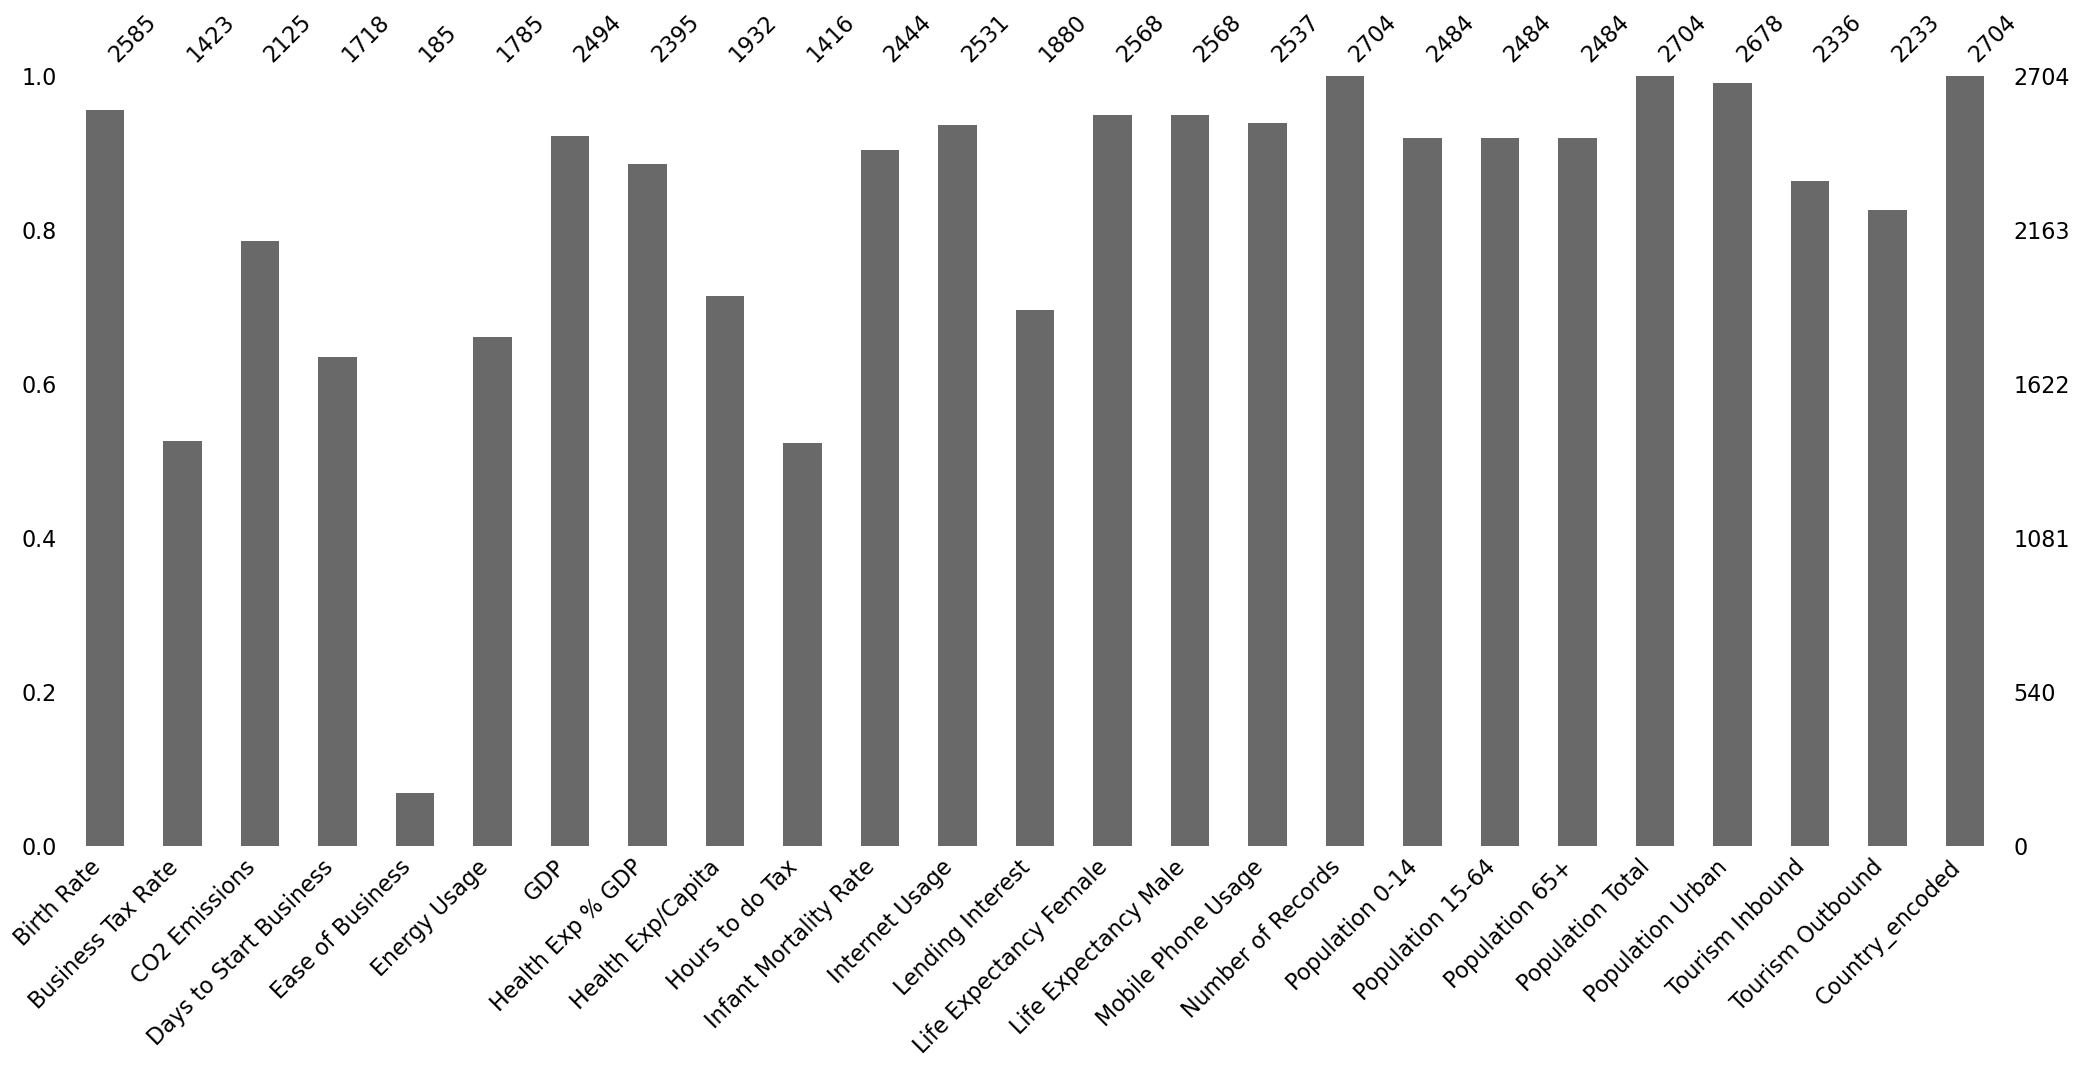

In [22]:
## visualize missing value for each artibute
import missingno as msno
msno.bar(global_data)
plt.show()

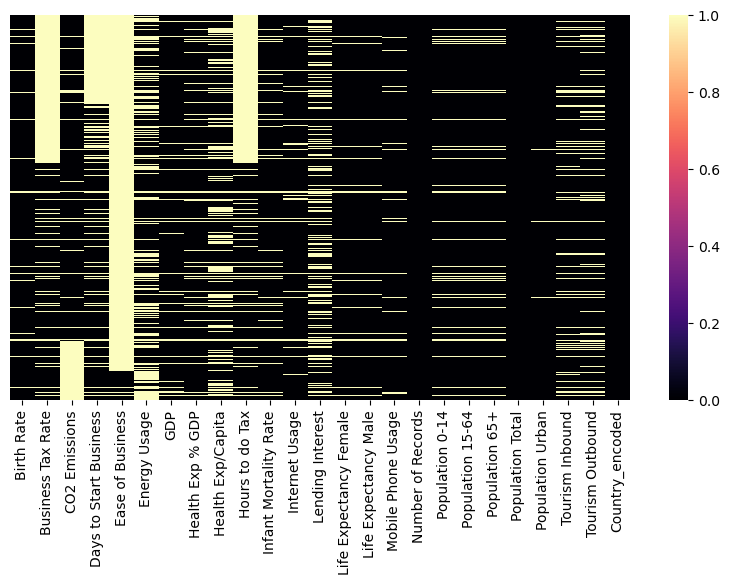

In [23]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(global_data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

# Missing Values and Imputation

In [24]:
## Check Columns
global_data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [25]:
global_data1=global_data.copy()

In [26]:
# Iterate over each column in the DataFrame
for column in global_data1.columns:
    # Calculate the mean of the column (ignoring NaN values)
    mean_value = global_data1[column].mean()
    
    # Replace NaN values in the column with the mean value
    global_data1[column].fillna(mean_value, inplace=True)


In [27]:
global_data1.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country_encoded           0
dtype: int64

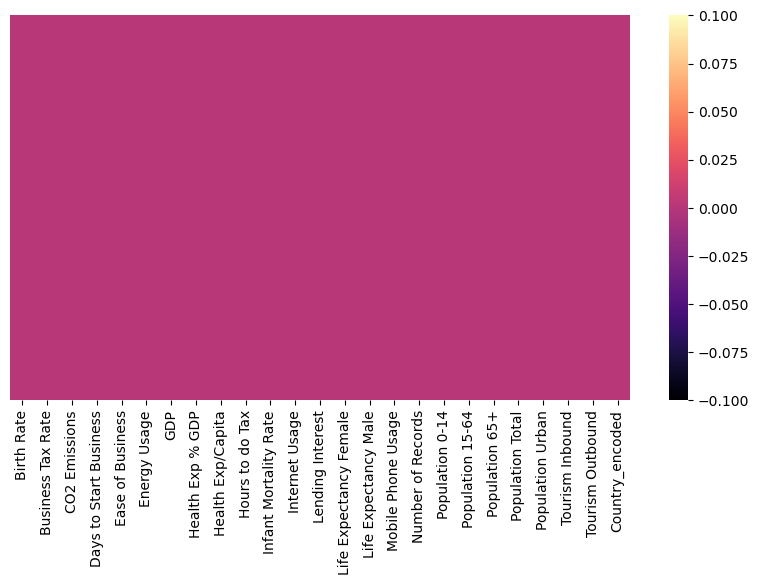

In [28]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(global_data1.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

In [29]:
global_data1['Birth Rate'].values

array([0.02 , 0.05 , 0.043, ..., 0.015, 0.02 , 0.011])

In [30]:
global_data1['Business Tax Rate'].values

array([48.96690091, 48.96690091, 48.96690091, ..., 41.9       ,
       61.9       , 48.96690091])

In [31]:
global_data1['Country_encoded'].nunique()

208

In [32]:
global_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   Business Tax Rate       2704 non-null   float64
 2   CO2 Emissions           2704 non-null   float64
 3   Days to Start Business  2704 non-null   float64
 4   Ease of Business        2704 non-null   float64
 5   Energy Usage            2704 non-null   float64
 6   GDP                     2704 non-null   float64
 7   Health Exp % GDP        2704 non-null   float64
 8   Health Exp/Capita       2704 non-null   float64
 9   Hours to do Tax         2704 non-null   float64
 10  Infant Mortality Rate   2704 non-null   float64
 11  Internet Usage          2704 non-null   float64
 12  Lending Interest        2704 non-null   float64
 13  Life Expectancy Female  2704 non-null   float64
 14  Life Expectancy Male    2704 non-null   

In [33]:
global_data1.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2704.000000,2704.000000,2.704000e+03,2704.000000,2704.000000,2.704000e+03,2.704000e+03,2704.000000,2704.000000,2704.000000,...,2704.000000,2704.0,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011086,29.704643,5.459901e+05,45.683314,14.295597,2.111643e+05,1.085131e+12,0.024774,197.569720,197.739909,...,0.459751,0.0,0.102148,0.066765,0.047482,1.242894e+08,0.244712,1.287363e+10,1.205649e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,40.400000,2.237000e+03,20.000000,94.875676,7.851750e+03,4.113748e+09,0.048000,58.000000,229.500000,...,0.200000,1.0,0.210000,0.565000,0.034000,8.783360e+05,0.357750,1.860000e+08,1.470000e+08,51.75000
50%,0.021000,48.966901,2.990450e+04,39.999418,94.875676,4.485050e+04,1.972267e+10,0.064000,214.627847,302.068503,...,0.578124,1.0,0.303051,0.631000,0.059000,5.800324e+06,0.562953,1.103500e+09,8.255000e+08,103.50000
75%,0.030000,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,1.890042e+11,0.076000,217.250000,302.068503,...,0.900000,1.0,0.395000,0.673000,0.105000,2.014089e+07,0.763000,4.939320e+09,4.729435e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


# Drop "Number of Records" column

In [34]:
global_data1 = global_data1.drop(['Number of Records'],axis=1)

In [35]:
correlation_matrix=global_data1.corr()

In [36]:
correlation_matrix

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
Birth Rate,1.000000,0.208287,-1.593606e-01,0.135839,1.805854e-01,-0.125939,-0.189939,-0.207529,-0.485382,0.050012,...,-0.818095,-0.535911,0.941336,-0.899107,-0.761073,-0.057766,-0.584429,-0.261777,-0.263887,0.038267
Business Tax Rate,0.208287,1.000000,1.713800e-02,0.012806,8.902402e-02,0.031657,0.005126,0.027437,-0.151452,0.138325,...,-0.225192,-0.162713,0.166597,-0.195192,-0.084154,0.046901,-0.085038,-0.014983,-0.018677,-0.127279
CO2 Emissions,-0.159361,0.017138,1.000000e+00,-0.042725,-6.226599e-19,0.903652,0.696981,0.146355,0.012089,0.059408,...,0.126106,0.045548,-0.178387,0.171467,0.142823,0.655654,0.084246,0.594232,0.562857,0.036659
Days to Start Business,0.135839,0.012806,-4.272465e-02,1.000000,9.885052e-02,-0.045669,-0.073437,-0.124392,-0.033428,0.142404,...,-0.171361,-0.158909,0.170855,-0.137062,-0.174695,0.001200,-0.070101,-0.111443,-0.107485,0.021501
Ease of Business,0.180585,0.089024,-6.226599e-19,0.098851,1.000000e+00,-0.028089,-0.079853,-0.078558,-0.106414,0.110532,...,-0.174241,-0.132692,0.200507,-0.170617,-0.191581,0.008501,-0.123717,-0.114168,-0.104491,-0.024527
Energy Usage,-0.125939,0.031657,9.036516e-01,-0.045669,-2.808887e-02,1.000000,0.842229,0.205554,-0.002942,0.056871,...,0.102729,0.036325,-0.147772,0.130961,0.133741,0.642157,0.068252,0.721109,0.676806,0.046987
GDP,-0.189939,0.005126,6.969807e-01,-0.073437,-7.985326e-02,0.842229,1.000000,0.325156,0.037628,0.026280,...,0.201913,0.125983,-0.229551,0.157662,0.272028,0.378485,0.175051,0.875847,0.852409,0.072601
Health Exp % GDP,-0.207529,0.027437,1.463550e-01,-0.124392,-7.855771e-02,0.205554,0.325156,1.000000,0.125186,-0.061273,...,0.196540,0.168751,-0.264943,0.084037,0.451756,-0.053905,0.186368,0.356173,0.341185,0.026962
Health Exp/Capita,-0.485382,-0.151452,1.208861e-02,-0.033428,-1.064144e-01,-0.002942,0.037628,0.125186,1.000000,-0.014715,...,0.428550,0.511064,-0.501557,0.527157,0.337627,-0.080105,0.387570,0.054828,0.056892,-0.024816
Hours to do Tax,0.050012,0.138325,5.940774e-02,0.142404,1.105322e-01,0.056871,0.026280,-0.061273,-0.014715,1.000000,...,-0.110353,-0.071217,0.057033,-0.063133,-0.034061,0.117345,0.006840,-0.051179,-0.035021,-0.097857


In [37]:
global_data1.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [38]:
global_data1 = global_data1.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
global_data1.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')

# Visualization 

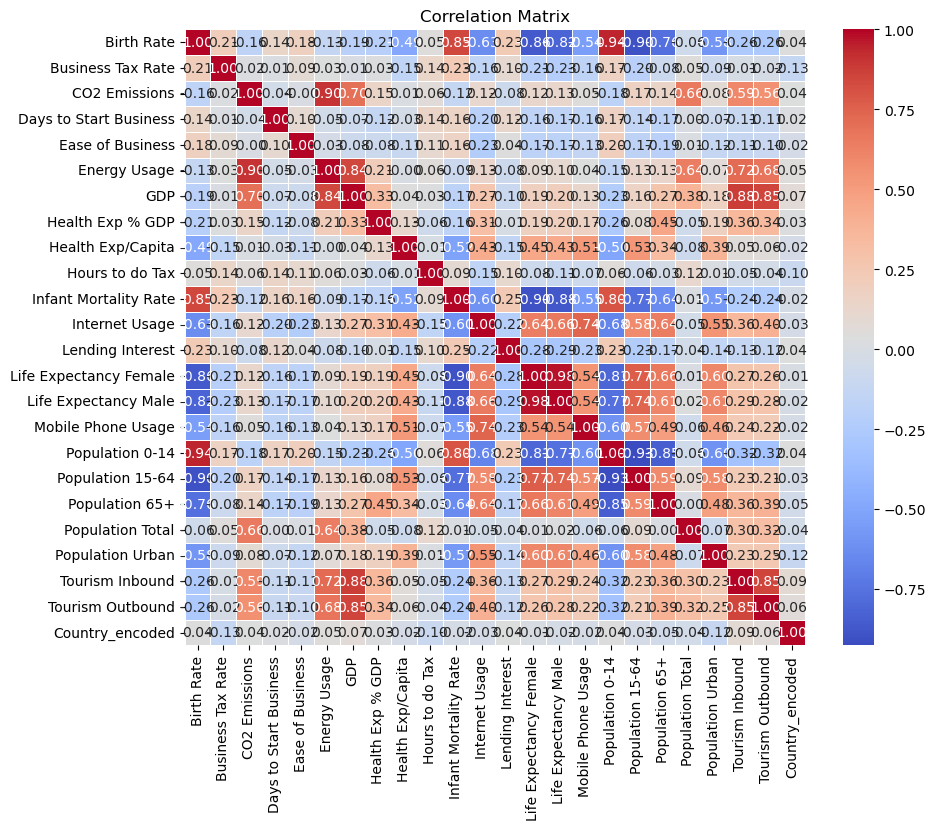

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection

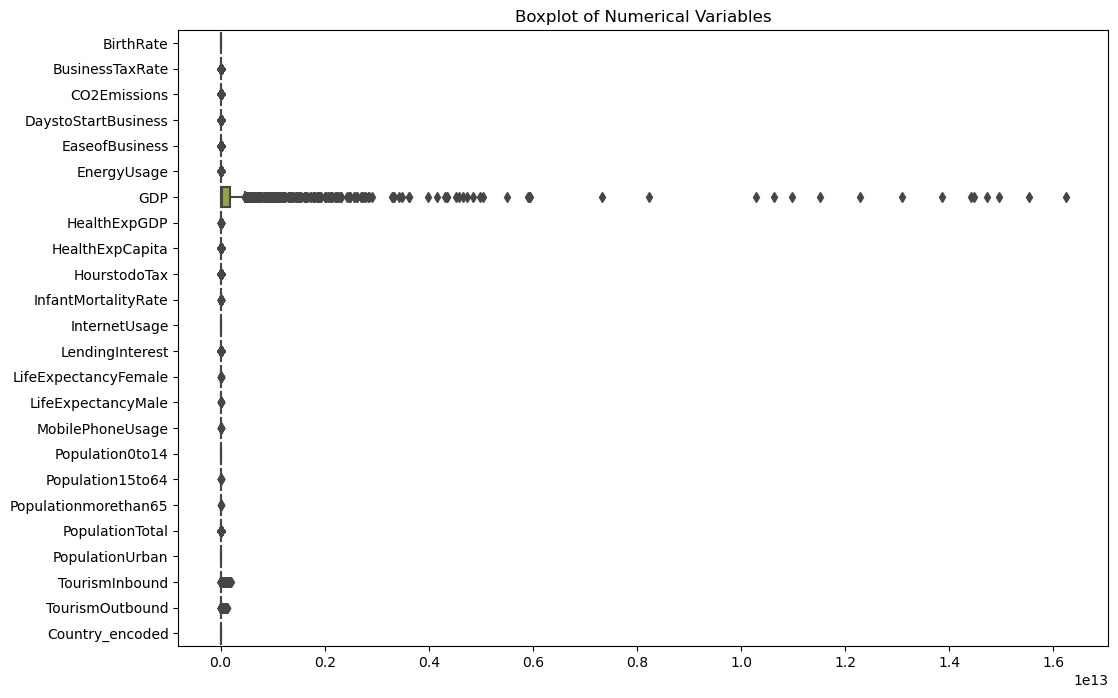

In [40]:
# Boxplot for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=global_data1, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

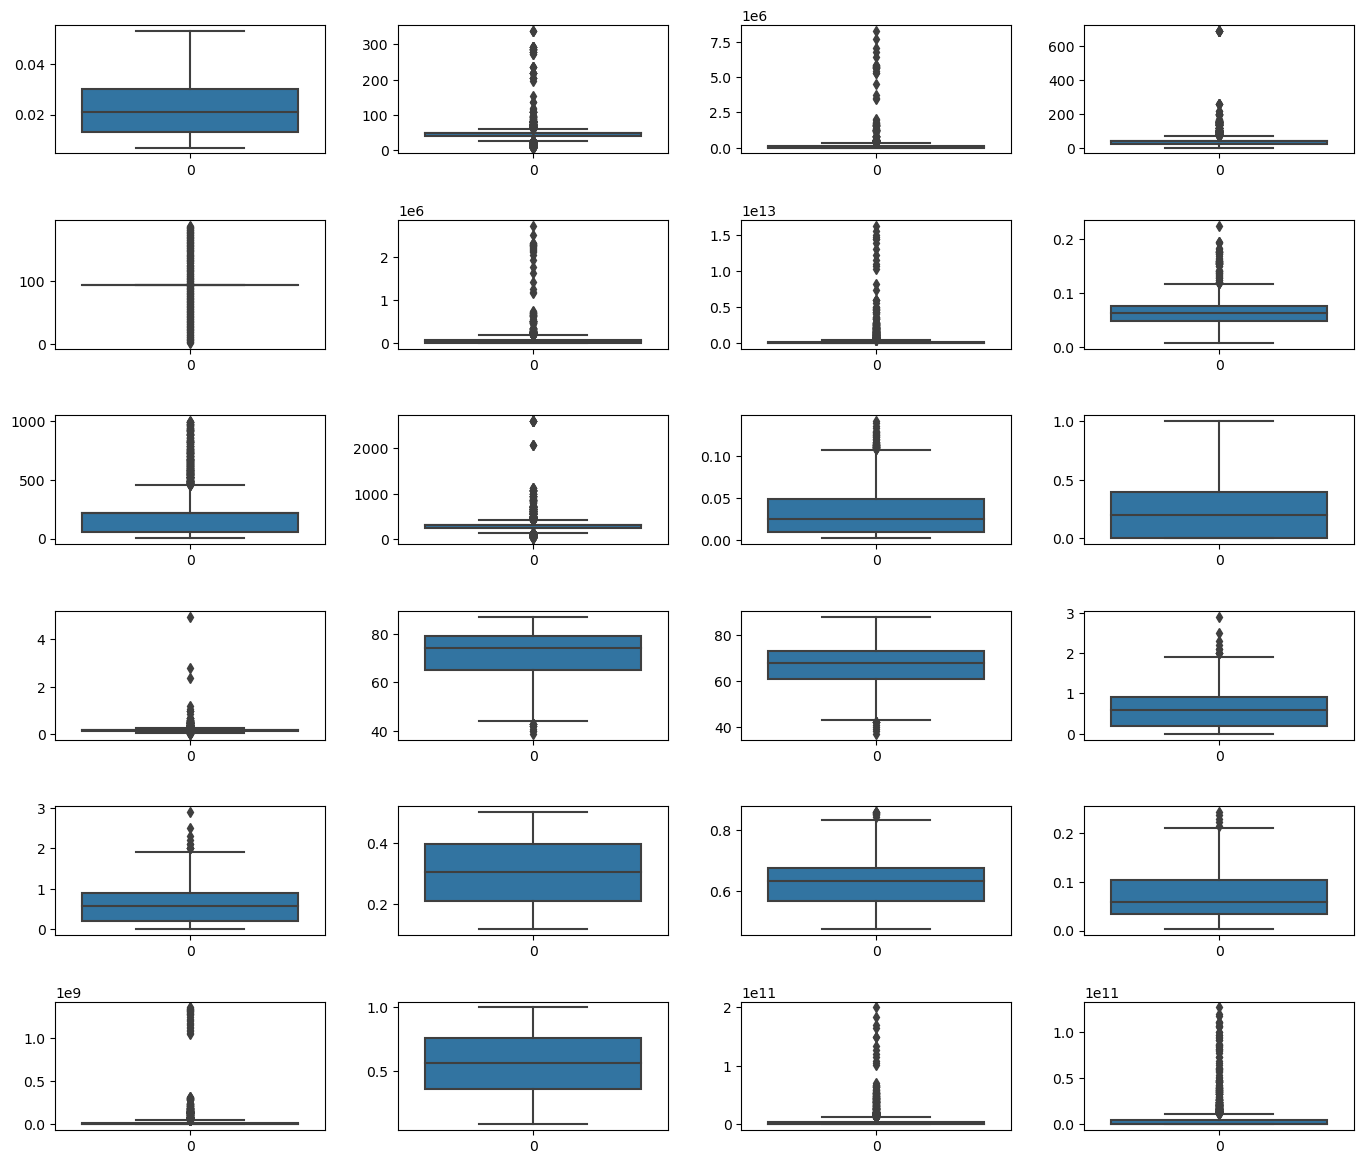

In [41]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(global_data1.BirthRate,ax=axes[0,0])
sns.boxplot(global_data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(global_data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(global_data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(global_data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(global_data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(global_data1.GDP,ax=axes[1,2])
sns.boxplot(global_data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(global_data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(global_data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(global_data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(global_data1.InternetUsage,ax=axes[2,3])
sns.boxplot(global_data1.LendingInterest,ax=axes[3,0])
sns.boxplot(global_data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(global_data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(global_data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(global_data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(global_data1.Population0to14,ax=axes[4,1])
sns.boxplot(global_data1.Population15to64,ax=axes[4,2])
sns.boxplot(global_data1.Populationmorethan65,ax=axes[4,3])
sns.boxplot(global_data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(global_data1.PopulationUrban,ax=axes[5,1])
sns.boxplot(global_data1.TourismInbound,ax=axes[5,2])
sns.boxplot(global_data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

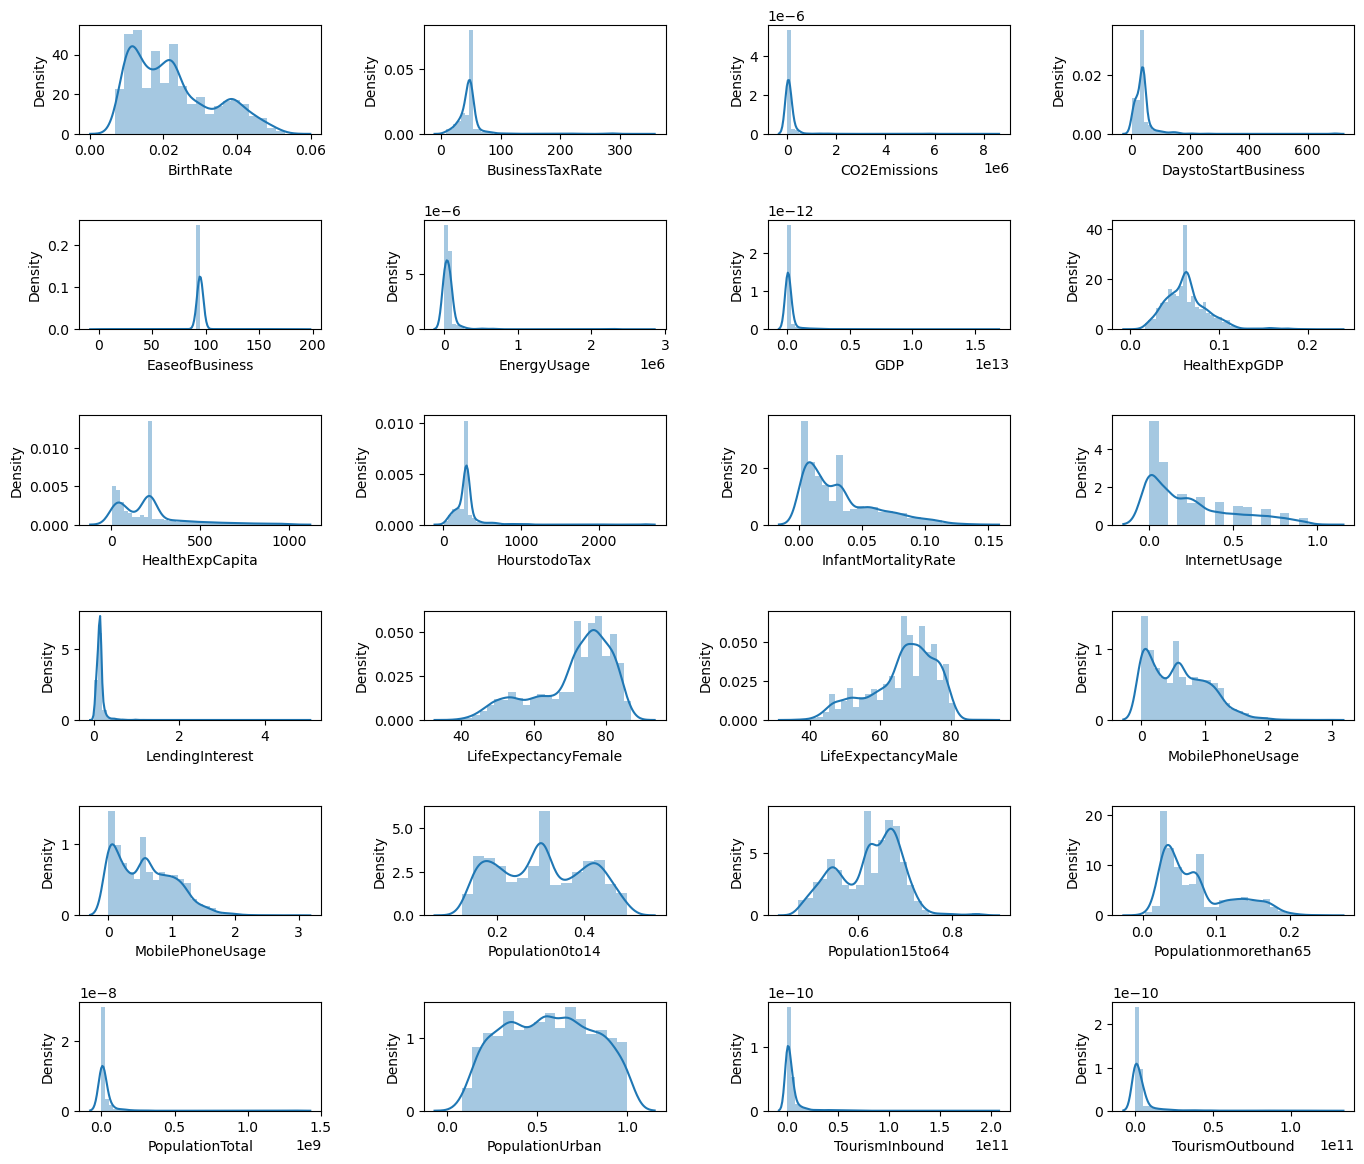

In [42]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(global_data1.BirthRate,ax=axes[0,0])
sns.distplot(global_data1.BusinessTaxRate,ax=axes[0,1])
sns.distplot(global_data1.CO2Emissions,ax=axes[0,2])
sns.distplot(global_data1.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(global_data1.EaseofBusiness,ax=axes[1,0])
sns.distplot(global_data1.EnergyUsage,ax=axes[1,1])
sns.distplot(global_data1.GDP,ax=axes[1,2])
sns.distplot(global_data1.HealthExpGDP,ax=axes[1,3])
sns.distplot(global_data1.HealthExpCapita,ax=axes[2,0])
sns.distplot(global_data1.HourstodoTax,ax=axes[2,1])
sns.distplot(global_data1.InfantMortalityRate,ax=axes[2,2])
sns.distplot(global_data1.InternetUsage,ax=axes[2,3])
sns.distplot(global_data1.LendingInterest,ax=axes[3,0])
sns.distplot(global_data1.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(global_data1.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(global_data1.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(global_data1.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(global_data1.Population0to14,ax=axes[4,1])
sns.distplot(global_data1.Population15to64,ax=axes[4,2])
sns.distplot(global_data1.Populationmorethan65,ax=axes[4,3])
sns.distplot(global_data1.PopulationTotal,ax=axes[5,0])
sns.distplot(global_data1.PopulationUrban,ax=axes[5,1])
sns.distplot(global_data1.TourismInbound,ax=axes[5,2])
sns.distplot(global_data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

# Method 1

# Remove Outlier Detection

In [43]:
# Calculate quartiles
Q1 = global_data1.quantile(0.25)
Q3 = global_data1.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a threshold for outlier detection
threshold = 1.5

# Identify outliers
outliers = ((global_data1 < (Q1 - threshold * IQR)) | (global_data1 > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers
data_no_outliers = global_data1[~outliers]

In [44]:
# Display the shape before and after removing outliers
print(f'Shape before removing outliers: {global_data1.shape}')
print(f'Shape after removing outliers: {data_no_outliers.shape}')

Shape before removing outliers: (2704, 24)
Shape after removing outliers: (1166, 24)


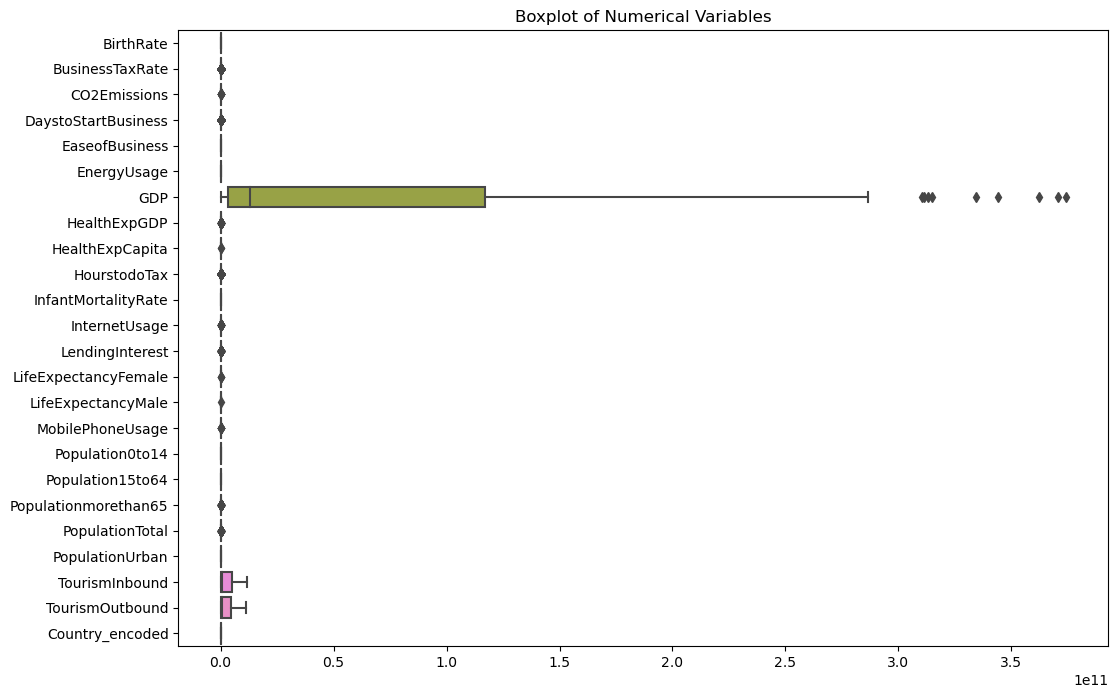

In [45]:
# Boxplot for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_no_outliers, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

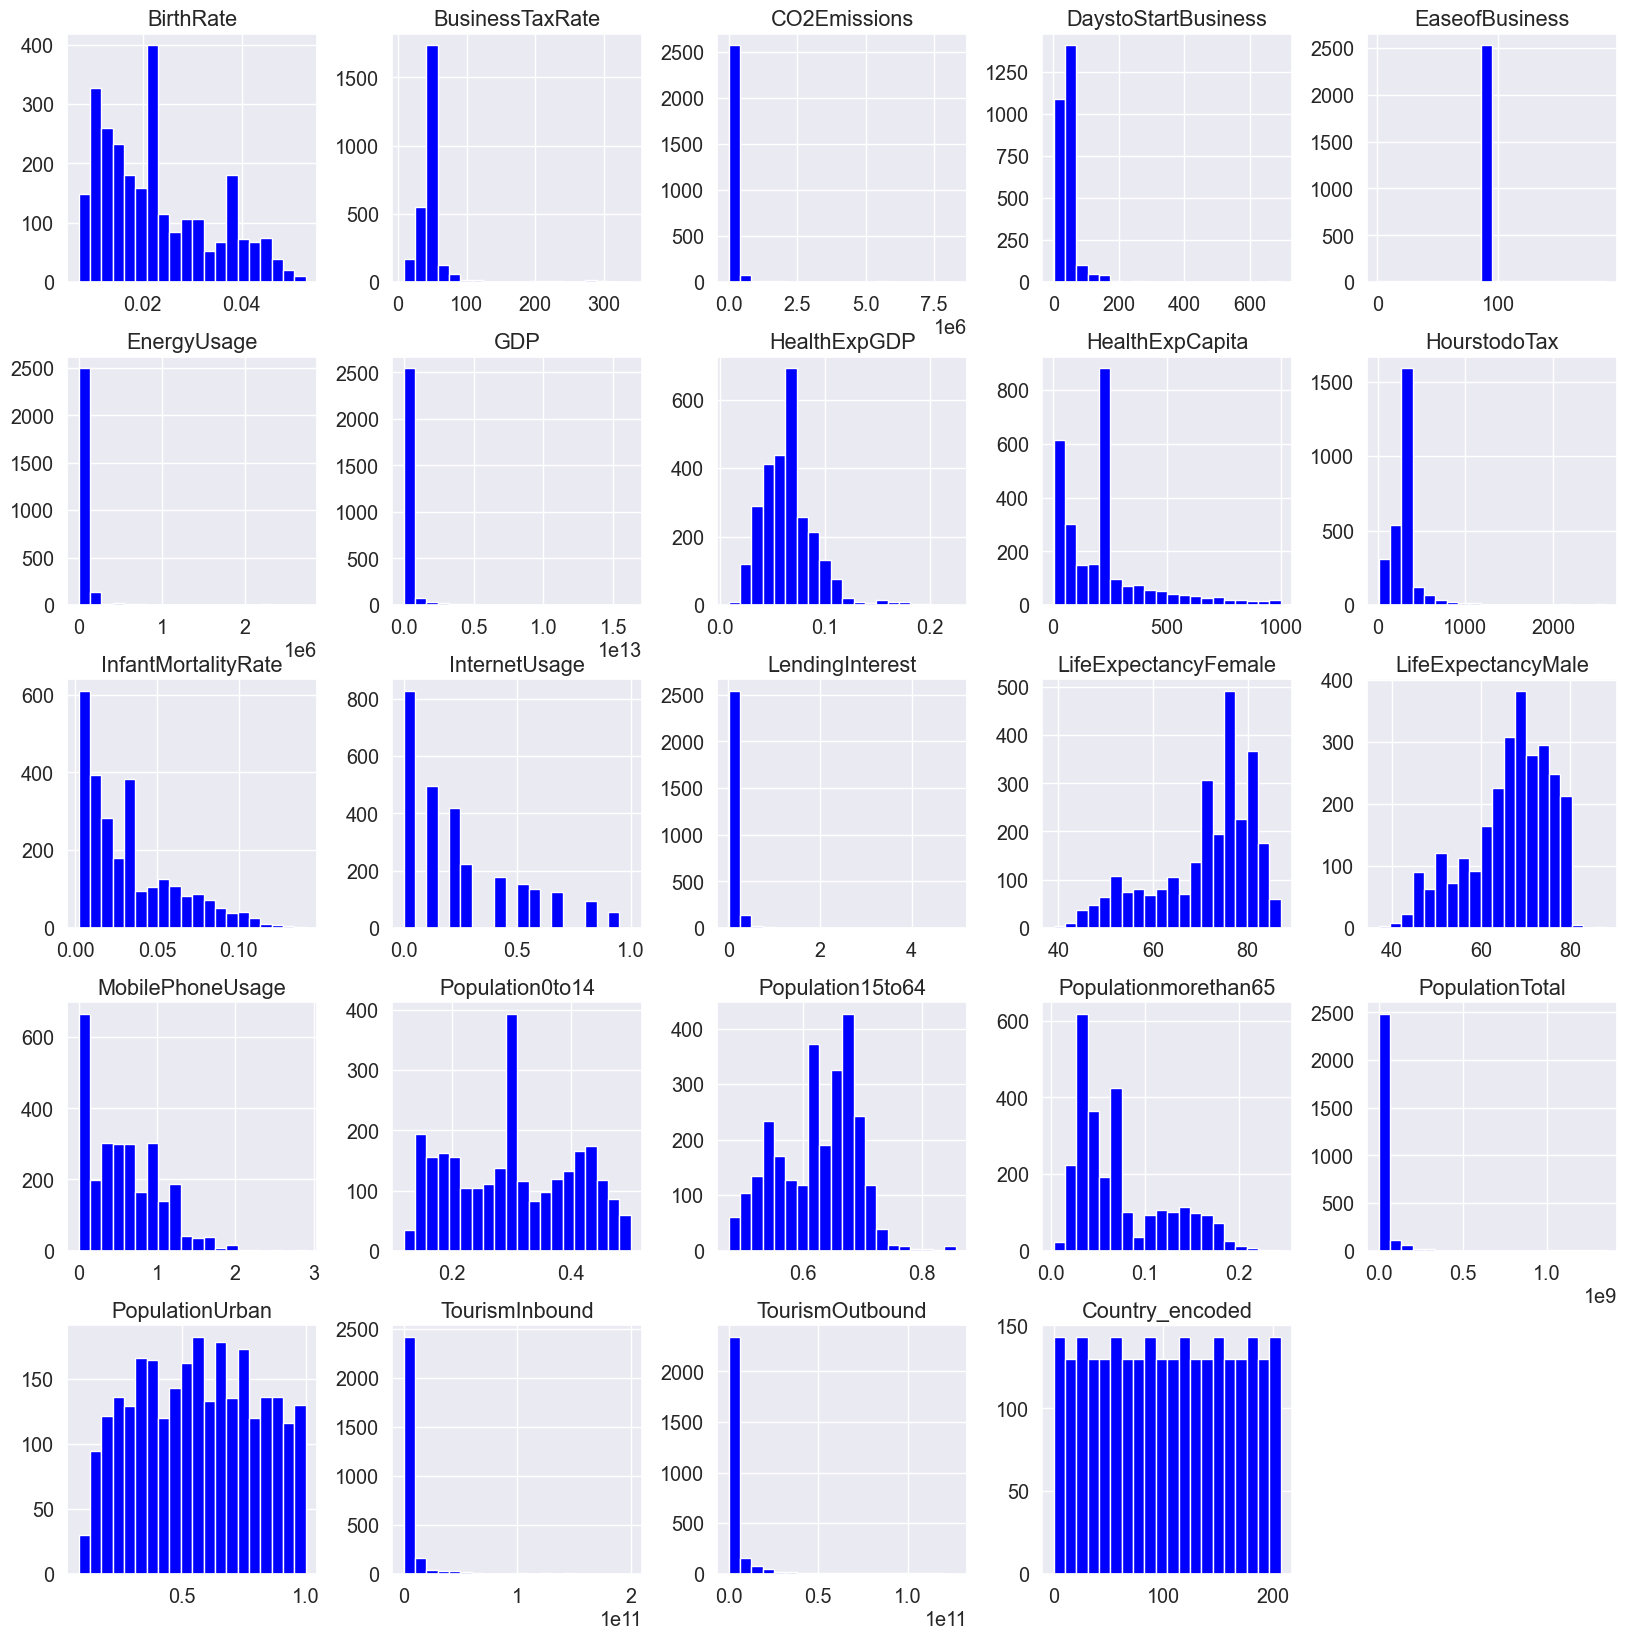

In [46]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=global_data1.hist(bins=20,color='blue' )

# Normalizing the numerical data 

In [47]:
std = StandardScaler()
data_normal=std.fit_transform(data_no_outliers)
data_normal

array([[-0.30760923,  0.38707145,  0.61862702, ..., -0.85315105,
        -0.78651788, -1.70456346],
       [ 1.75318057,  0.38707145, -0.73933526, ..., -0.86377529,
        -0.84973637, -1.40069472],
       [ 0.31958767,  0.38707145, -0.6975017 , ..., -0.80002986,
        -0.77944448, -1.31628674],
       ...,
       [-0.66600746,  0.38707145,  1.47411632, ...,  1.20256269,
         1.21898272,  1.21595272],
       [-0.06435597,  0.38707145,  1.47411632, ...,  1.20256269,
         1.21898272,  1.51982146],
       [-1.11400524,  0.38707145,  1.47411632, ...,  1.20256269,
         1.21898272,  1.70551902]])

Apply Principal Component Analysis (PCA) for visualization purposes


In [48]:
pca2=PCA(n_components=3)
pca_components=pd.DataFrame(pca2.fit_transform(data_normal),columns=['a','b','c'])
pca_components

,a,b,c
0,-1.349027,-1.086755,-0.921352
1,-4.824682,-0.606137,-0.459797
2,-3.105611,-1.130219,-0.807125
3,-5.602824,0.476325,-0.360252
4,-5.801125,0.534869,-0.191461
...,...,...,...
1161,2.460356,2.881748,-0.416084
1162,1.099784,1.274677,-0.876801
1163,2.119232,2.506939,-0.872354
1164,1.576708,2.945074,-0.774102


In [49]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(data_normal)

In [50]:
pca_values

array([[-1.34902601, -1.08617866, -0.92250782, ...,  0.8152872 ,
        -0.39718269, -1.28930293],
       [-4.82468112, -0.60664744, -0.45998478, ...,  0.56790714,
         0.12063205,  0.13353584],
       [-3.10561191, -1.13092864, -0.8059481 , ...,  0.85743354,
         0.16786221,  1.34166659],
       ...,
       [ 2.11923158,  2.50633852, -0.87130327, ..., -0.91472218,
        -0.31337272,  0.1290255 ],
       [ 1.5767083 ,  2.94513369, -0.77500416, ..., -0.2461959 ,
        -0.32487463,  0.72188699],
       [ 3.74641816,  2.39959885, -0.99079356, ..., -0.33388688,
        -0.09471361,  0.10653717]])

In [51]:
# The amount of variance that each PCA explains is 

var = pca.explained_variance_ratio_
var

array([0.3787784 , 0.1052969 , 0.09083376, 0.05842013, 0.04504359,
       0.04289171, 0.03985699, 0.02910394, 0.0284131 , 0.02722104,
       0.02581163, 0.023289  , 0.0214124 ])

In [52]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([37.88, 48.41, 57.49, 63.33, 67.83, 72.12, 76.11, 79.02, 81.86,
       84.58, 87.16, 89.49, 91.63])

In [53]:
pca.components_

array([[-3.06500243e-01,  2.85906195e-03,  1.23218534e-01,
        -5.73747812e-02,  0.00000000e+00, -7.62143024e-03,
         1.46055701e-01,  1.19294350e-01,  2.55020042e-01,
         1.70666005e-03, -2.85298405e-01,  2.53764373e-01,
        -1.54002340e-01,  3.05402852e-01,  2.99862594e-01,
         2.37510358e-01, -3.08276892e-01,  2.91822763e-01,
         2.79611780e-01, -1.24304804e-01,  2.38715731e-01,
         1.64231133e-01,  1.39775469e-01, -2.19857290e-02],
       [ 1.39195234e-01,  9.13747753e-02,  3.50789929e-01,
         5.08953318e-03, -3.46944695e-18,  3.84268326e-01,
         3.92607672e-01,  4.39718855e-02, -2.22047783e-02,
         4.55442141e-02,  2.03672512e-01,  1.43143310e-01,
         1.26574226e-01, -1.09497051e-01, -9.55143736e-02,
         5.62099303e-02,  1.28159184e-01, -1.58381091e-01,
        -5.96584712e-02,  5.76561378e-02,  6.94900595e-02,
         4.05307325e-01,  4.59529087e-01,  1.09379141e-01],
       [ 1.21915818e-01, -5.28535155e-01, -1.20592919e

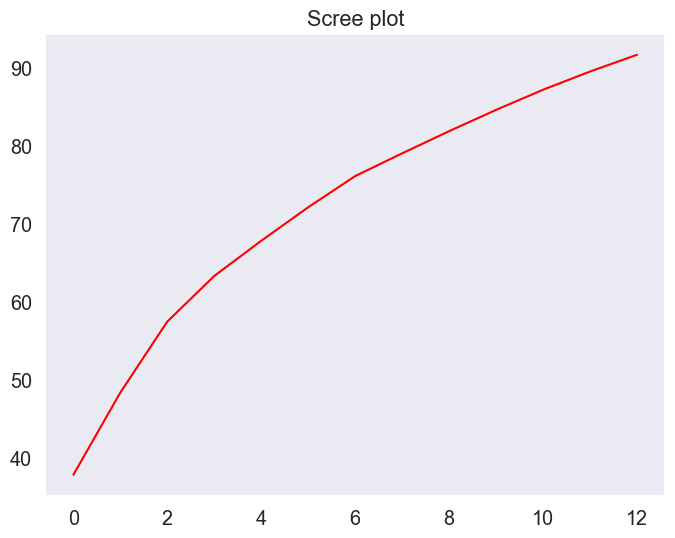

In [54]:
# Variance plot for PCA components obtained  Scree plot
plt.figure(figsize=(8, 6))
plt.plot(var1,color="red")
plt.title('Scree plot')
plt.show()

In [55]:
final_global_df=pd.DataFrame(pca_values[:,0:10],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
                                       )

In [56]:
final_global_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-1.349026,-1.086179,-0.922508,1.572932,-0.440903,-1.930453,-1.498361,0.961226,0.119478,1.156146
1,-4.824681,-0.606647,-0.459985,-0.858355,-0.942708,-0.441887,-1.127630,0.215328,0.236955,-0.616527
2,-3.105612,-1.130929,-0.805948,-0.971905,-0.754261,-0.827459,-0.614314,0.371685,-0.086561,-0.809645
3,-5.602825,0.475563,-0.359611,-1.423104,-0.372125,-0.245360,-0.349016,-0.053282,0.249788,0.827535
4,-5.801126,0.533977,-0.190766,-1.907459,-0.568027,0.108317,0.089025,-0.069647,0.158521,0.943531
...,...,...,...,...,...,...,...,...,...,...
1161,2.460357,2.881632,-0.416111,-1.012691,0.091151,-0.899648,-0.188170,-0.049572,0.298181,-0.617485
1162,1.099785,1.275510,-0.879210,0.040004,1.210327,-1.032059,1.481361,0.259154,1.844157,-0.520405
1163,2.119232,2.506339,-0.871303,0.613374,0.833481,0.314834,0.762302,-0.067410,0.059216,-0.071666
1164,1.576708,2.945134,-0.775004,0.491247,0.728302,0.122873,0.716579,0.250924,0.655377,-0.734934


# Hierarchical_Clustering

In [57]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch  # create dendrogram
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

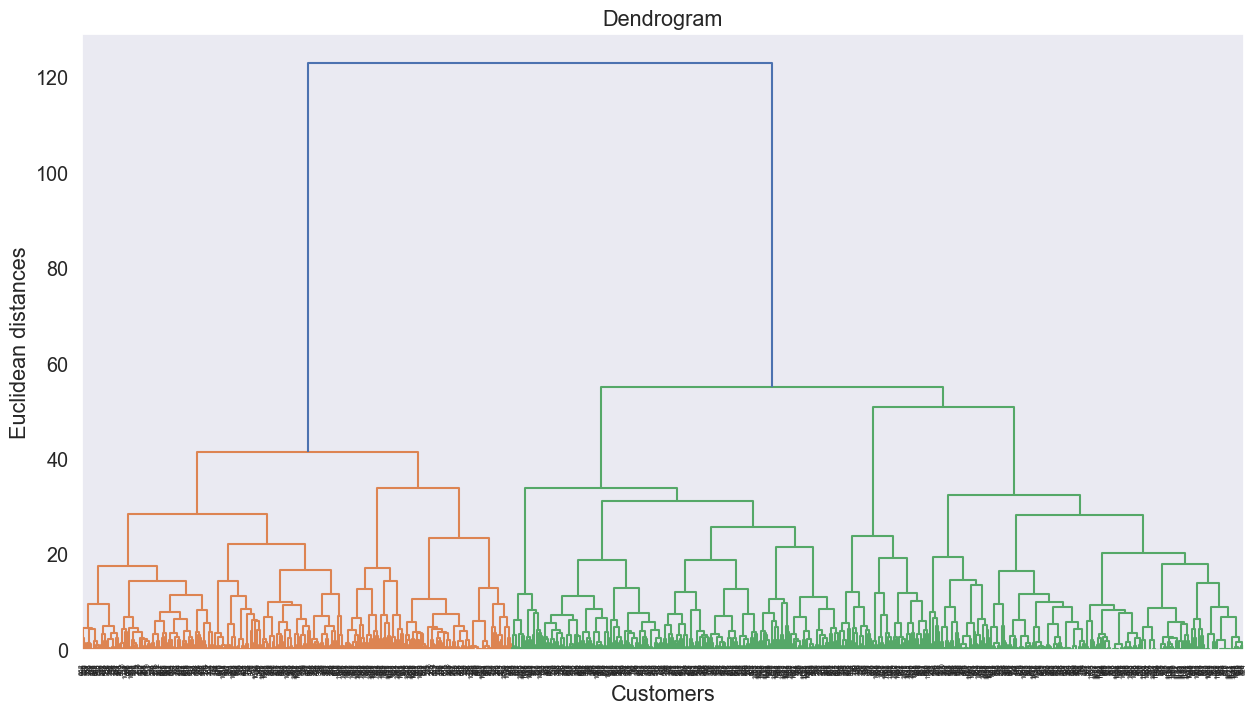

In [58]:
# create dendrogram
plt.figure(figsize =(15,8))
dendrogram = sch.dendrogram(sch.linkage(final_global_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [59]:
# create clusters
global_hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [60]:
global_hc.fit(final_global_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [61]:
# save clusters for chart
y_hc = global_hc.fit_predict(final_global_df)

In [62]:
y_hc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [63]:
y_hc.shape


(1166,)

In [64]:
data_no_outliers['h_clusterid'] = y_hc

In [65]:
data_no_outliers['h_clusterid'].unique()

array([0, 1, 2, 3], dtype=int64)

In [66]:
data_no_outliers.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,h_clusterid
0,0.020,48.966901,87931.0,39.999418,94.875676,26998.000000,5.479006e+10,0.035,60.0,302.068503,...,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,0
2,0.043,48.966901,1617.0,39.999418,94.875676,1983.000000,2.359122e+09,0.043,15.0,302.068503,...,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,0
3,0.027,48.966901,4276.0,39.999418,94.875676,1836.000000,5.788312e+09,0.047,152.0,302.068503,...,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,0
4,0.046,48.966901,1041.0,39.999418,94.875676,77236.840896,2.610959e+09,0.051,12.0,302.068503,...,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,0
5,0.042,48.966901,301.0,39.999418,94.875676,77236.840896,8.704861e+08,0.063,7.0,302.068503,...,0.0,0.490,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,30.0,0


In [67]:
data_no_outliers.tail()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,h_clusterid
2679,0.014000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,1.000000,0.303051,0.623481,0.073465,56810.0,0.852000,4.939320e+09,4.729435e+09,72.0,1
2692,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.578124,0.303051,0.623481,0.073465,39088.0,1.000000,8.540000e+08,1.200000e+08,164.0,1
2695,0.016000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.578124,0.303051,0.623481,0.073465,30959.0,0.562953,4.939320e+09,4.729435e+09,175.0,1
2699,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.578124,0.303051,0.623481,0.073465,32427.0,0.911000,4.939320e+09,4.729435e+09,193.0,1
2703,0.011000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.578124,0.206000,0.641000,0.152000,105275.0,0.949000,4.939320e+09,4.729435e+09,204.0,1


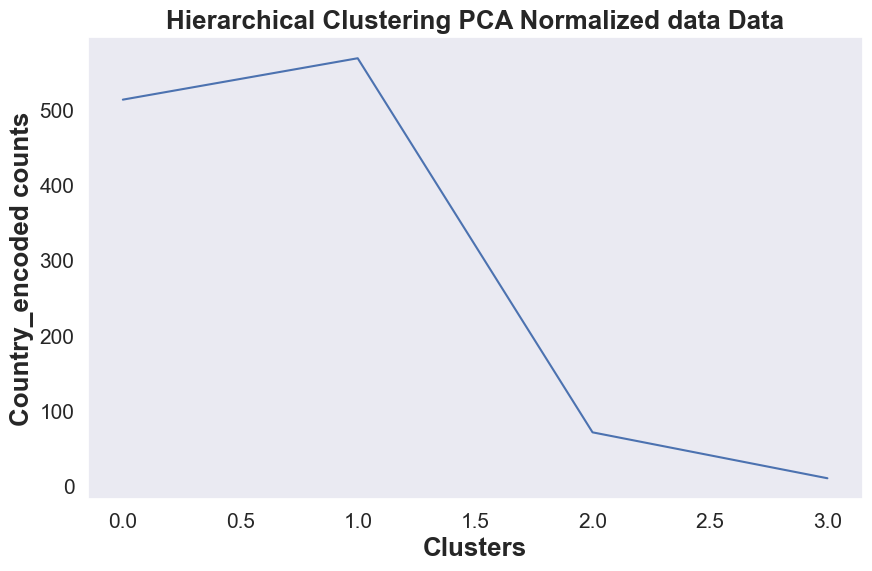

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
data_no_outliers.groupby(['h_clusterid']).count()['Country_encoded'].plot(kind='line')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Normalized data Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Country_encoded counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

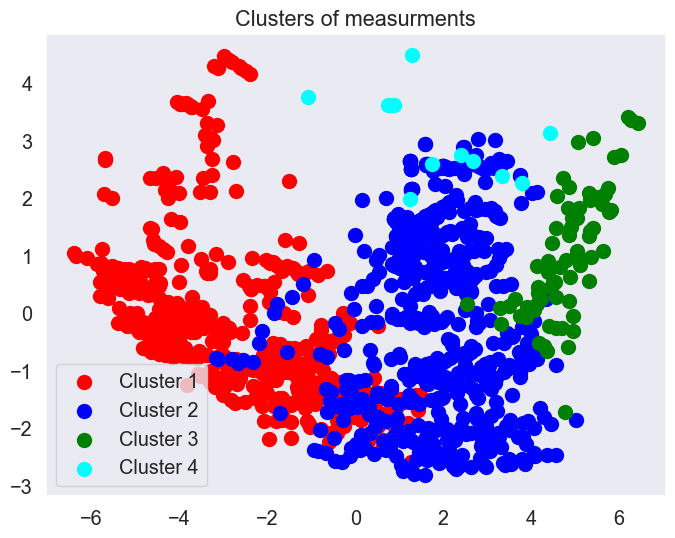

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_values[y_hc == 0, 0], pca_values[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_values[y_hc == 1, 0], pca_values[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_values[y_hc == 2, 0], pca_values[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_values[y_hc == 3, 0], pca_values[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [70]:
## Accuracy check
from sklearn.metrics import silhouette_score
M1_hierarchy = silhouette_score(final_global_df,y_hc)
print('Silhouette Score for Hierarchy clustring :',M1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.2015258733050075


# K_Means

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

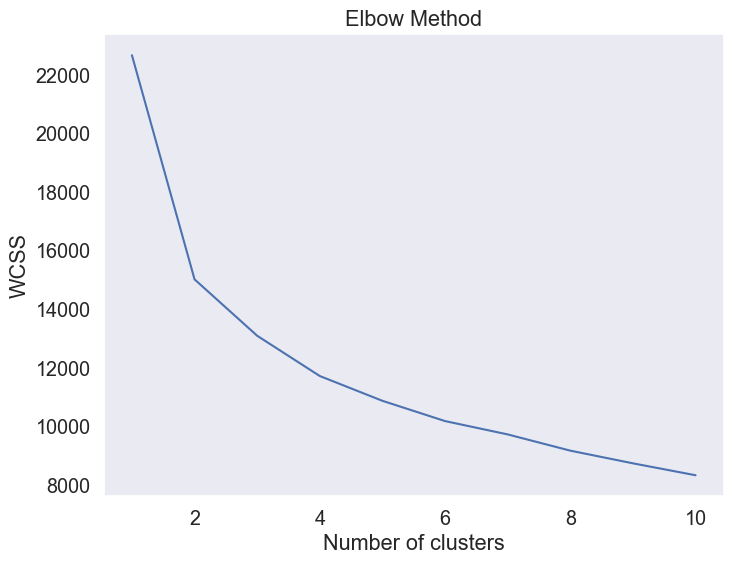

In [72]:
plt.figure(figsize=(8, 6))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(final_global_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
predict_Kmeans_ag=clusters_new.fit_predict(final_global_df)

In [74]:
clusters_new.labels_

array([0, 1, 1, ..., 3, 3, 3])

In [75]:
data_no_outliers['clusterid_new'] = clusters_new.labels_

In [76]:
data_no_outliers

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,h_clusterid,clusterid_new
0,0.020000,48.966901,87931.000000,39.999418,94.875676,26998.000000,5.479006e+10,0.03500,60.000000,302.068503,...,0.342000,0.619000,0.039000,31719449.0,0.599000,1.020000e+08,1.930000e+08,2.0,0,0
2,0.043000,48.966901,1617.000000,39.999418,94.875676,1983.000000,2.359122e+09,0.04300,15.000000,302.068503,...,0.454000,0.517000,0.029000,6949366.0,0.383000,7.700000e+07,5.000000e+07,20.0,0,1
3,0.027000,48.966901,4276.000000,39.999418,94.875676,1836.000000,5.788312e+09,0.04700,152.000000,302.068503,...,0.383000,0.587000,0.029000,1755375.0,0.532000,2.270000e+08,2.090000e+08,25.0,0,1
4,0.046000,48.966901,1041.000000,39.999418,94.875676,77236.840896,2.610959e+09,0.05100,12.000000,302.068503,...,0.468000,0.505000,0.028000,11607944.0,0.178000,2.300000e+07,3.000000e+07,29.0,0,1
5,0.042000,48.966901,301.000000,39.999418,94.875676,77236.840896,8.704861e+08,0.06300,7.000000,302.068503,...,0.490000,0.481000,0.029000,6674286.0,0.082000,1.400000e+06,1.400000e+07,30.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,0.014000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,56810.0,0.852000,4.939320e+09,4.729435e+09,72.0,1,3
2692,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,39088.0,1.000000,8.540000e+08,1.200000e+08,164.0,1,3
2695,0.016000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,30959.0,0.562953,4.939320e+09,4.729435e+09,175.0,1,3
2699,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,32427.0,0.911000,4.939320e+09,4.729435e+09,193.0,1,3


In [77]:
silhouette_score_average_K_mean = silhouette_score(final_global_df, predict_Kmeans_ag)
print('Silhouette Score for K-means clustring :', silhouette_score_average_K_mean)

Silhouette Score for K-means clustring : 0.21246401484848165


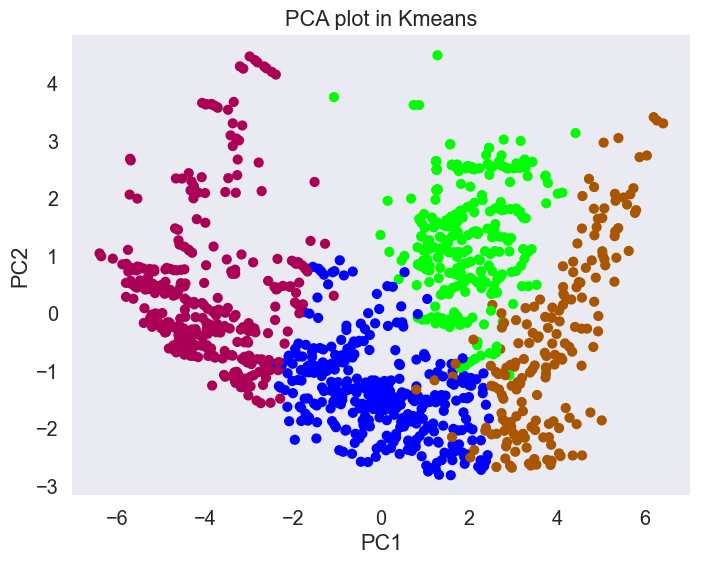

In [78]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(final_global_df.iloc[:,0], final_global_df.iloc[:,1], c=predict_Kmeans_ag, cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in Kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise. It's a density-based clustering algorithm, unlike k-means.

This is a good algorithm for finding outliners in a data set. It finds arbitrarily shaped clusters based on the density of data points in different regions. It separates regions by areas of 
low-density so that it can detect outliers between the high-density clusters.

In [79]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_labels= dbscan.fit_predict(final_global_df)

In [81]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbscan_cluster'])
cl

,dbscan_cluster
0,0
1,0
2,0
3,0
4,0
...,...
1161,0
1162,0
1163,0
1164,0


In [83]:
data_no_outliers

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,h_clusterid,clusterid_new
0,0.020000,48.966901,87931.000000,39.999418,94.875676,26998.000000,5.479006e+10,0.03500,60.000000,302.068503,...,0.342000,0.619000,0.039000,31719449.0,0.599000,1.020000e+08,1.930000e+08,2.0,0,0
2,0.043000,48.966901,1617.000000,39.999418,94.875676,1983.000000,2.359122e+09,0.04300,15.000000,302.068503,...,0.454000,0.517000,0.029000,6949366.0,0.383000,7.700000e+07,5.000000e+07,20.0,0,1
3,0.027000,48.966901,4276.000000,39.999418,94.875676,1836.000000,5.788312e+09,0.04700,152.000000,302.068503,...,0.383000,0.587000,0.029000,1755375.0,0.532000,2.270000e+08,2.090000e+08,25.0,0,1
4,0.046000,48.966901,1041.000000,39.999418,94.875676,77236.840896,2.610959e+09,0.05100,12.000000,302.068503,...,0.468000,0.505000,0.028000,11607944.0,0.178000,2.300000e+07,3.000000e+07,29.0,0,1
5,0.042000,48.966901,301.000000,39.999418,94.875676,77236.840896,8.704861e+08,0.06300,7.000000,302.068503,...,0.490000,0.481000,0.029000,6674286.0,0.082000,1.400000e+06,1.400000e+07,30.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,0.014000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,56810.0,0.852000,4.939320e+09,4.729435e+09,72.0,1,3
2692,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,39088.0,1.000000,8.540000e+08,1.200000e+08,164.0,1,3
2695,0.016000,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,30959.0,0.562953,4.939320e+09,4.729435e+09,175.0,1,3
2699,0.022715,48.966901,142307.107765,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,214.627847,302.068503,...,0.303051,0.623481,0.073465,32427.0,0.911000,4.939320e+09,4.729435e+09,193.0,1,3


In [84]:
clustered = pd.concat([data_no_outliers,cl],axis=1)

In [85]:
clustered

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,h_clusterid,clusterid_new,dbscan_cluster
0,0.020,48.966901,87931.0,39.999418,94.875676,26998.000000,5.479006e+10,0.035,60.0,302.068503,...,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,0.0,0.0,0.0
2,0.043,48.966901,1617.0,39.999418,94.875676,1983.000000,2.359122e+09,0.043,15.0,302.068503,...,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,0.0,1.0,0.0
3,0.027,48.966901,4276.0,39.999418,94.875676,1836.000000,5.788312e+09,0.047,152.0,302.068503,...,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,0.0,1.0,0.0
4,0.046,48.966901,1041.0,39.999418,94.875676,77236.840896,2.610959e+09,0.051,12.0,302.068503,...,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,0.0,1.0,0.0
5,0.042,48.966901,301.0,39.999418,94.875676,77236.840896,8.704861e+08,0.063,7.0,302.068503,...,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,30.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [86]:
clustered['dbscan_cluster'].unique()

array([ 0.,  1., -1., nan])

In [87]:
clustered.mean()

BirthRate               2.343316e-02
BusinessTaxRate         4.691558e+01
CO2Emissions            4.861019e+04
DaystoStartBusiness     3.558455e+01
EaseofBusiness          9.487568e+01
EnergyUsage             4.288995e+04
GDP                     7.249504e+10
HealthExpGDP            6.159657e-02
HealthExpCapita         1.626633e+02
HourstodoTax            2.887968e+02
InfantMortalityRate     3.490587e-02
InternetUsage           2.084756e-01
LendingInterest         1.355493e-01
LifeExpectancyFemale    7.091369e+01
LifeExpectancyMale      6.620098e+01
MobilePhoneUsage        4.645555e-01
Population0to14         3.184543e-01
Population15to64        6.124018e-01
Populationmorethan65    6.914260e-02
PopulationTotal         7.911210e+06
PopulationUrban         5.570840e-01
TourismInbound          2.109558e+09
TourismOutbound         1.972100e+09
Country_encoded         1.029717e+02
h_clusterid             6.397942e-01
clusterid_new           1.385935e+00
dbscan_cluster         -1.715266e-03
d

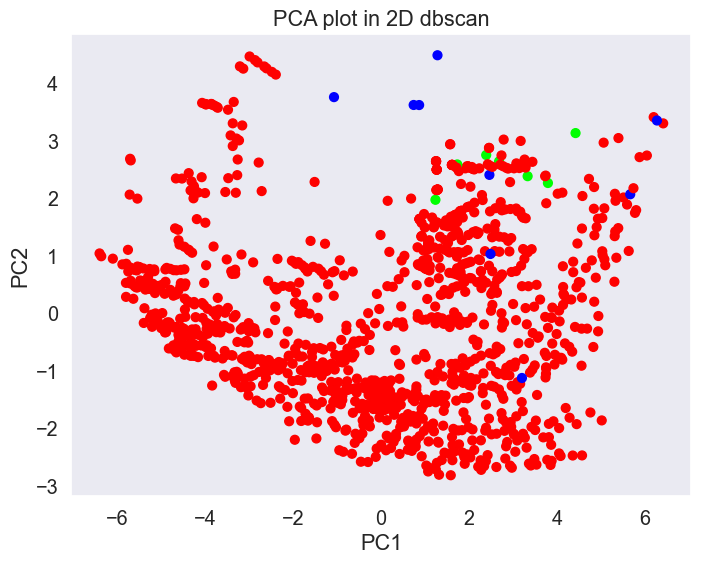

In [88]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(final_global_df.iloc[:,0], final_global_df.iloc[:,1], c=dbscan_labels , cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D dbscan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [89]:
silhouette_score_average_dbscan = silhouette_score(final_global_df, dbscan_labels)
print('Silhouette Score for DBSCAN clustring :', silhouette_score_average_dbscan)

Silhouette Score for DBSCAN clustring : 0.20629375991662918


# Gaussian Mixture Model

One of the problems with k-means is that the data needs to follow a circular format. The way k-means calculates the distance between data points has to do with a circular path, so non-circular data isn't clustered correctly.

This is an issue that Gaussian mixture models fix. You don’t need circular shaped data for it to work well.

In [90]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [91]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(final_global_df)

In [92]:
# get all of the unique clusters
gaussian_clusters = unique(gmm_labels)

In [93]:
gaussian_clusters

array([0, 1, 2], dtype=int64)

In [94]:
silhouette_score_average_Gaussian = silhouette_score(final_global_df, gmm_labels)

In [95]:
print('Silhouette Score for Gaussian Mixture clustring :', silhouette_score_average_Gaussian)

Silhouette Score for Gaussian Mixture clustring : 0.19293660946505653


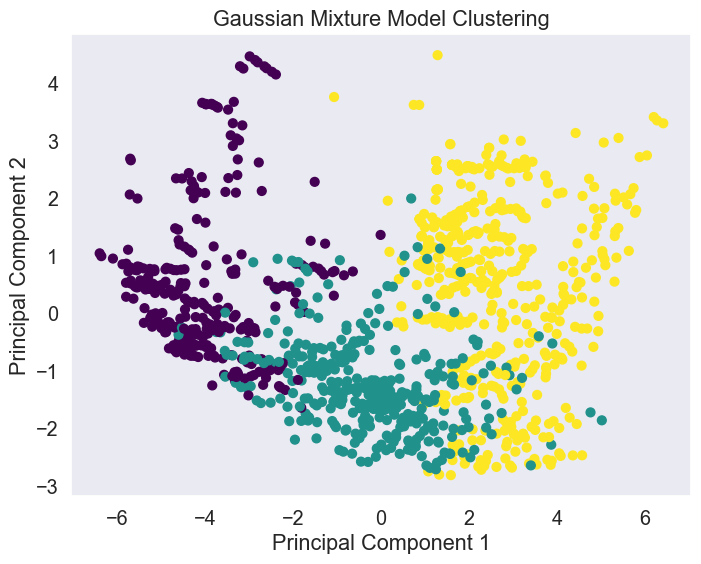

In [96]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(final_global_df.iloc[:,0], final_global_df.iloc[:,1], c=gmm_labels, cmap="viridis", s=40)

# Aesthetics
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# BIRCH algorithm

The Balance Iterative Reducing and Clustering using Hierarchies (BIRCH) algorithm works better on large data sets than the k-means algorithm.

It breaks the data into little summaries that are clustered instead of the original data points. The summaries hold as much distribution information about the data points as possible.

This algorithm is commonly used with other clustering algorithm because the other clustering techniques can be used on the summaries generated by BIRCH.

The main downside of the BIRCH algorithm is that it only works on numeric data values. You can't use this for categorical values unless you do some data transformations.

In [97]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

In [98]:
# define the model
birch_model = Birch(threshold=0.03, n_clusters=2)

In [99]:
# train the model
birch_model_cluster = birch_model.fit_predict(final_global_df)

In [100]:
# get all of the unique clusters
birch_clusters = unique(birch_model_cluster)

In [101]:
birch_clusters

array([0, 1], dtype=int64)

In [102]:
silhouette_score_average_birch = silhouette_score(final_global_df, birch_model_cluster)
print('Silhouette Score for birch clustring :', silhouette_score_average_birch)

Silhouette Score for birch clustring : 0.29490853854011395


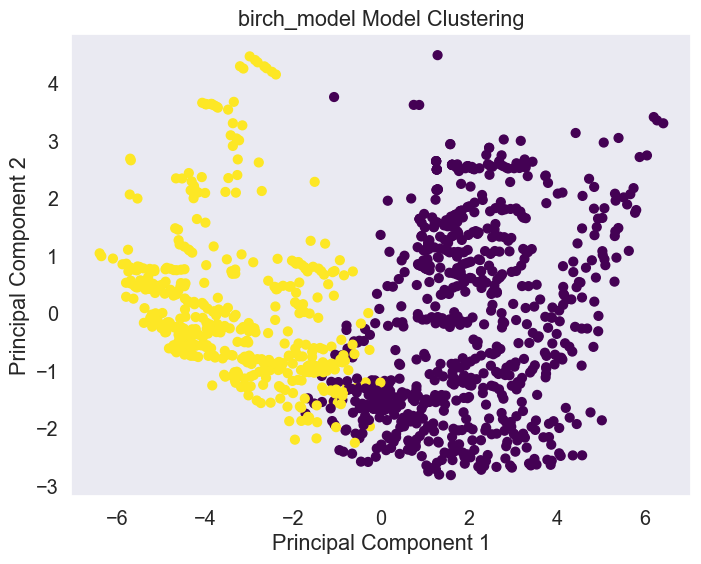

In [103]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(final_global_df.iloc[:,0], final_global_df.iloc[:,1], c=birch_model_cluster, cmap="viridis", s=40)

# Aesthetics
plt.title('birch_model Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Mean-Shift clustering algorithm

Mean-shift is similar to the BIRCH algorithm because it also finds clusters without an initial number of clusters being set.

This is a hierarchical clustering algorithm, but the downside is that it doesn't scale well when working with large data sets.

It works by iterating over all of the data points and shifts them towards the mode. The mode in this context is the high density area of data points in a region.

In [104]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift

In [105]:
bandwidth = 1.0
# define the model
mean_model = MeanShift(bandwidth=bandwidth)

# assign each data point to a cluster
mean_result = mean_model.fit_predict(final_global_df)

# get all of the unique clusters
mean_clusters = unique(mean_result)

In [106]:
mean_clusters.shape

(417,)

In [107]:
silhouette_score_average_mean_result = silhouette_score(final_global_df, mean_result)
print('Silhouette Score for mean_result clustring :', silhouette_score_average_mean_result)

Silhouette Score for mean_result clustring : 0.48581694770045764


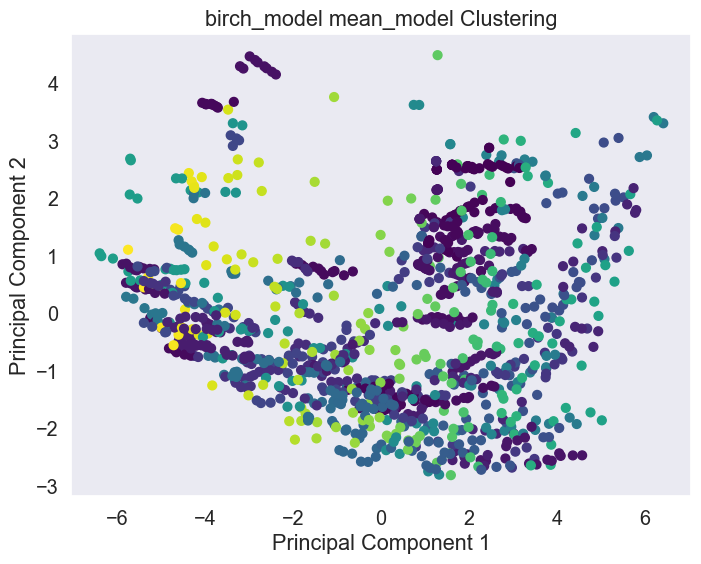

In [108]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(final_global_df.iloc[:,0], final_global_df.iloc[:,1], c=mean_result, cmap="viridis", s=40)

# Aesthetics
plt.title('birch_model mean_model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Method 2

With ouliers

In [111]:
global_data2=global_data1.copy()

In [112]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(global_data2)

Apply PCA

In [113]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [114]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.50638642e-01, 1.66333584e-01, 6.14029987e-02, 5.36420804e-02,
       4.56533013e-02, 3.96203679e-02, 3.75286179e-02, 3.41088454e-02,
       3.32351034e-02, 3.22259432e-02, 2.97228093e-02, 2.40057384e-02,
       2.09579974e-02, 1.87097292e-02, 1.27708648e-02, 1.09268018e-02,
       8.70710182e-03, 5.70218563e-03, 4.80848651e-03, 4.27762594e-03,
       2.38562125e-03, 1.97529123e-03, 6.59658103e-04, 6.03605034e-07])

In [115]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([35.06, 51.69, 57.83, 63.19, 67.76, 71.72, 75.47, 78.88, 82.2 ,
       85.42, 88.39, 90.79, 92.89, 94.76, 96.04, 97.13, 98.  , 98.57,
       99.05, 99.48, 99.72, 99.92, 99.99, 99.99])

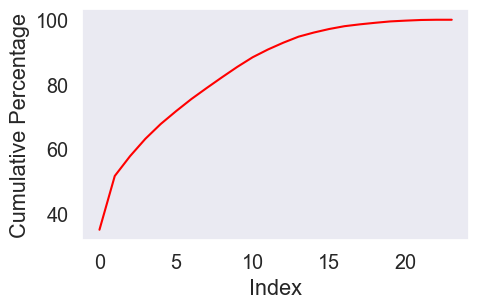

In [116]:
# Variance plot for PCA components obtained
# Figure size
plt.figure(figsize=(5,3))

plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

In [117]:
data_pca2 = pc_components[:,:15]

K-means Clustring

Using the elbow method to find the optimal number of clusters

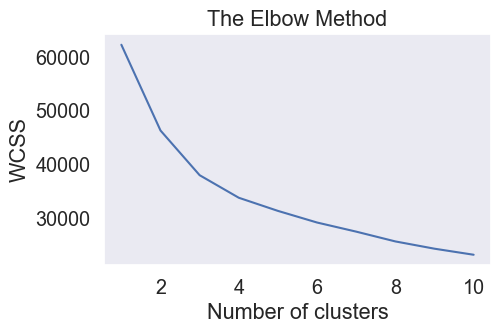

In [118]:
plt.figure(figsize=(5,3))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

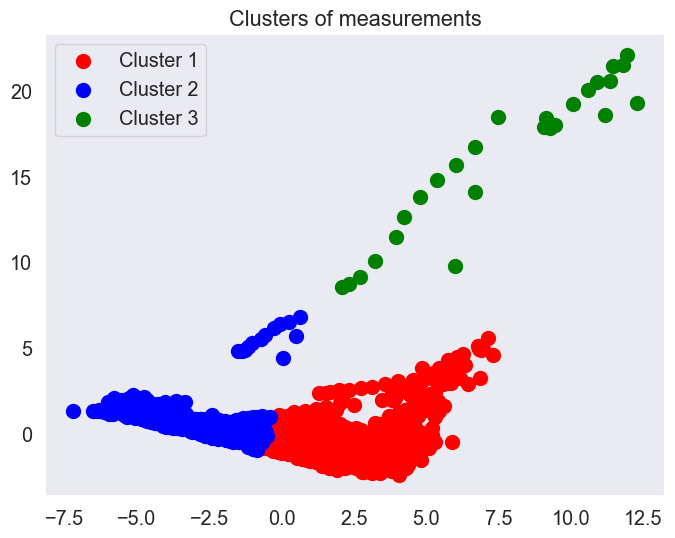

In [120]:
plt.figure(figsize=(8,6))

plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [121]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.3032174649031628


Hierarchy Clustring

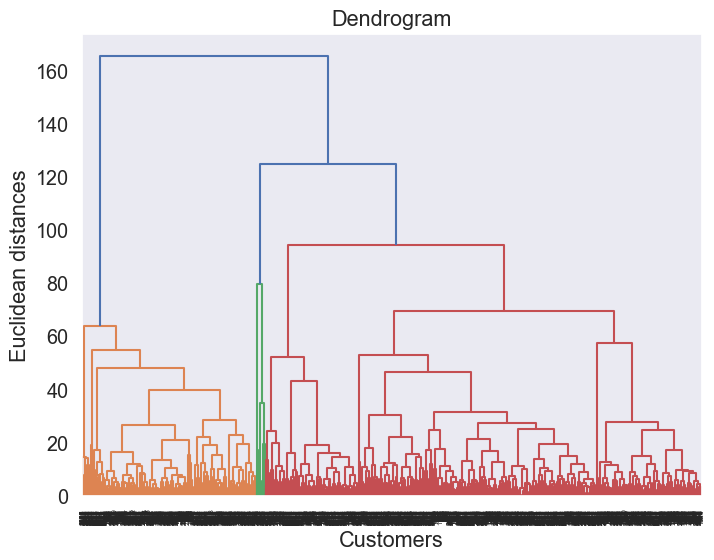

In [122]:
plt.figure(figsize=(8,6))

dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [123]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2)

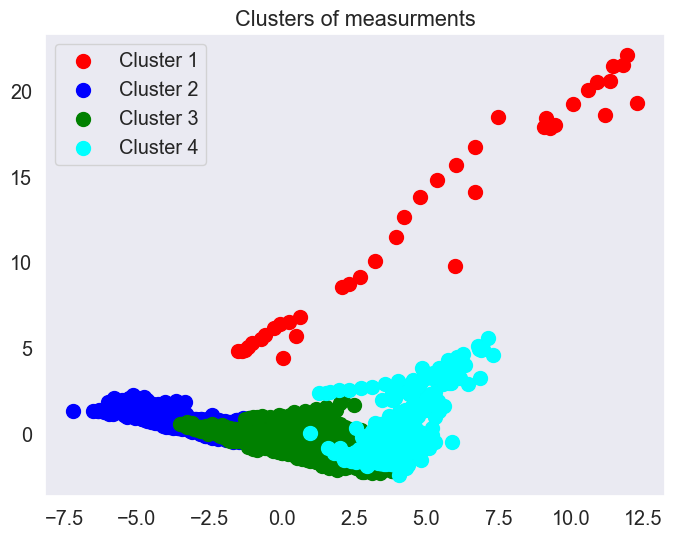

In [124]:
plt.figure(figsize=(8,6))

plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [125]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.20610525826268455


DBSCAN

In [126]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca2)

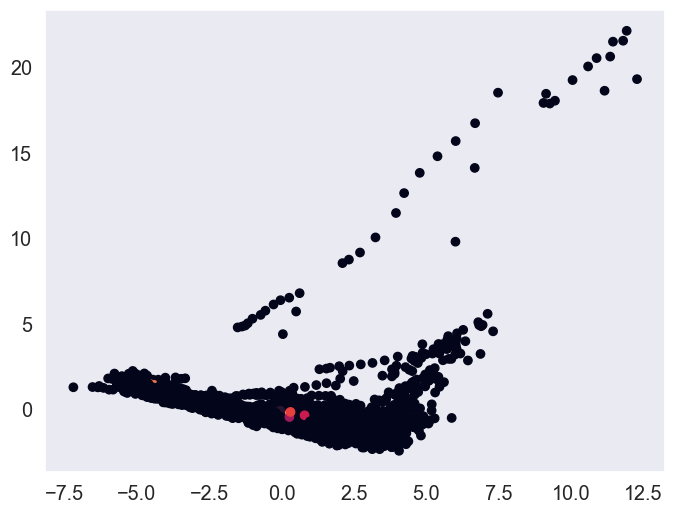

In [127]:
plt.figure(figsize=(8,6))

plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [128]:
global_data2['cluster']=dbscan.labels_

In [129]:
global_data2

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020000,48.966901,87931.000000,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,302.068503,...,0.000000,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050000,48.966901,9542.000000,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,302.068503,...,0.000000,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043000,48.966901,1617.000000,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,302.068503,...,0.000000,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027000,48.966901,4276.000000,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,302.068503,...,0.100000,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046000,48.966901,1041.000000,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,302.068503,...,0.000000,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,214.627847,302.068503,...,0.578124,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,193.0,5
2700,0.013000,46.400000,142307.107765,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,214.627847,175.000000,...,1.000000,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,198.0,-1
2701,0.015000,41.900000,142307.107765,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,214.627847,310.000000,...,1.500000,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020000,61.900000,142307.107765,144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,792.000000,...,1.000000,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [130]:
s2_dbscan = silhouette_score(data_pca2, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)

Silhouette Score for DBSCAN is: -0.416719163404002


# Method 3

T-SNE

In [131]:
global_data3=global_data1.copy()

In [132]:
global_data3

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded
0,0.020000,48.966901,87931.000000,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,302.068503,...,67.000000,0.000000,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050000,48.966901,9542.000000,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,302.068503,...,44.000000,0.000000,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043000,48.966901,1617.000000,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,302.068503,...,53.000000,0.000000,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027000,48.966901,4276.000000,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,302.068503,...,49.000000,0.100000,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046000,48.966901,1041.000000,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,302.068503,...,49.000000,0.000000,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,214.627847,302.068503,...,66.461838,0.578124,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,193.0
2700,0.013000,46.400000,142307.107765,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,214.627847,175.000000,...,76.000000,1.000000,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,198.0
2701,0.015000,41.900000,142307.107765,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,214.627847,310.000000,...,74.000000,1.500000,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020000,61.900000,142307.107765,144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,792.000000,...,72.000000,1.000000,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,202.0


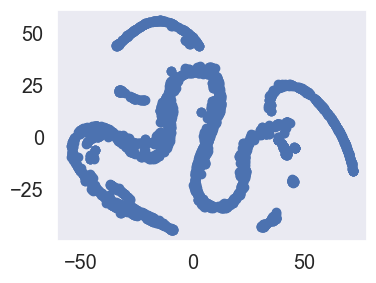

In [133]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(global_data3)

# Plot the results
plt.figure(figsize=(4,3))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

K-means Clustring

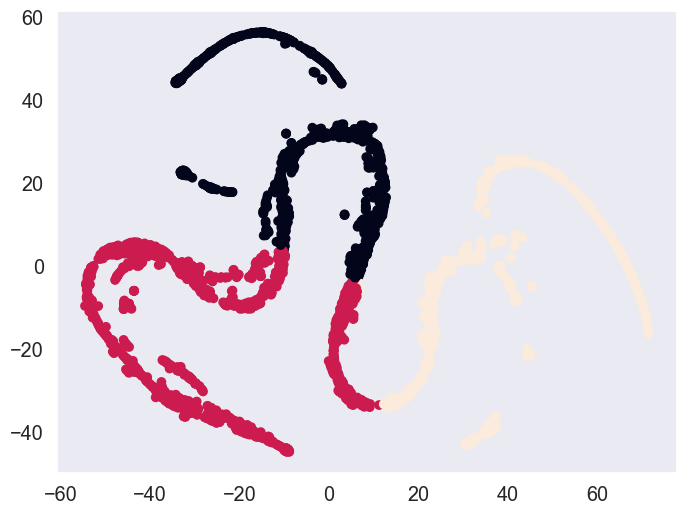

In [134]:
# Perform clustering with KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_kmeans)
plt.show()

In [135]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)

Silhouette Score for K-means clustring : 0.42555684


Hierarchy Clustring

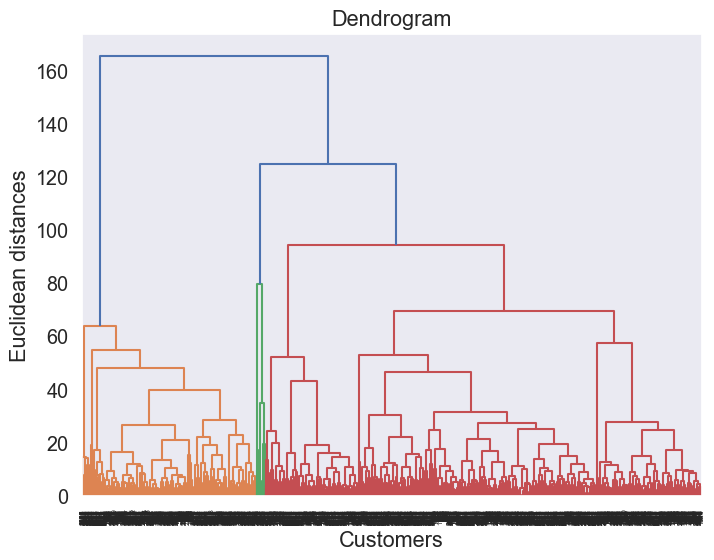

In [136]:
plt.figure(figsize=(8,6))

dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [137]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

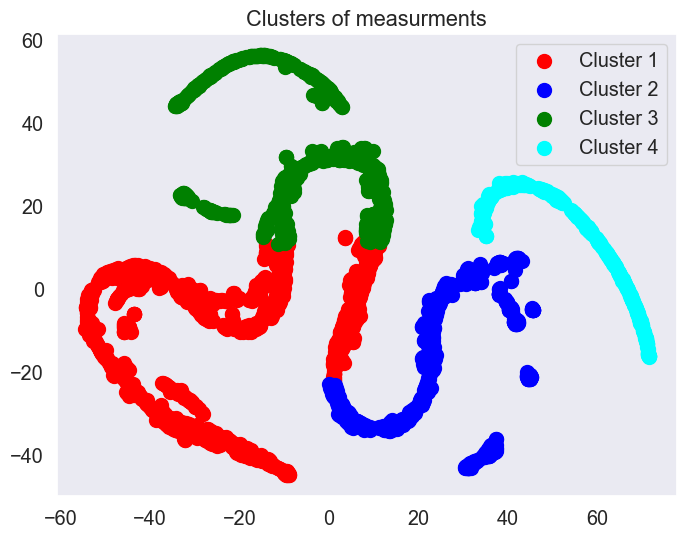

In [138]:
plt.figure(figsize=(8,6))

plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [139]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.3786666


In [140]:
df = pd.DataFrame({'Method':['Method-1 Hierarchical_Clustering','Method-1 kmeans','Method-1 DBSCAN','Method-1 Gaussian Mixture Model',
                             'Method-1 BIRCH algorithm','Method-1 Mean-Shift clustering','Method-2 kmeans','Method-2 hierarchy',
                             'Method-2 DBSCAN','Method-3 kmeans','Method-3 hierarchy'],
                   'Silhouette Score':[M1_hierarchy,silhouette_score_average_K_mean,silhouette_score_average_dbscan,silhouette_score_average_Gaussian,
                                       silhouette_score_average_birch,silhouette_score_average_mean_result,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy]})
df

,Method,Silhouette Score
0,Method-1 Hierarchical_Clustering,0.201526
1,Method-1 kmeans,0.212464
2,Method-1 DBSCAN,0.206294
3,Method-1 Gaussian Mixture Model,0.192937
4,Method-1 BIRCH algorithm,0.294909
5,Method-1 Mean-Shift clustering,0.485817
6,Method-2 kmeans,0.303217
7,Method-2 hierarchy,0.206105
8,Method-2 DBSCAN,-0.416719
9,Method-3 kmeans,0.425557
